# Running SCellBOW phenotype algebra on a simulated prostate cancer dataset
> ### There are three molecular subtype - ARAH, ARAL, and NE

In [1]:
import SCellBOW as sb
import scanpy as sc
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/namratab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# SCellBOW Pretrained model

In [2]:
adata_source = sc.read("data/adata_source.h5ad")
adata_source

AnnData object with n_obs × n_vars = 1334 × 2000

In [3]:
adata_train = sc.read("data/adata_train.h5ad")
adata_train

/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 81 × 17981
    obs: 'subtype', 'time', 'status'
    var: 'n_cells'

In [4]:
adata_target = sc.read("data/adata_target.h5ad")
adata_target

AnnData object with n_obs × n_vars = 836 × 2000
    obs: 'subtype'

In [5]:
# preprocessing source data
adata_source.var_names_make_unique()
sc.pp.filter_cells(adata_source, min_genes=10)
sc.pp.filter_genes(adata_source, min_cells=2)

sc.pp.normalize_total(adata_source, target_sum=1e4)
sc.pp.log1p(adata_source)
    
sc.pp.highly_variable_genes(adata_source, n_top_genes = 1000)
adata_source = adata_source[:, adata_source.var.highly_variable]

sc.pp.scale(adata_source, max_value=10)
adata_source

/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 1334 × 1000
    obs: 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [6]:
#invoke SCellBOW pretraining
sb.SCellBOW_pretrain(adata_source, save_dir= "pca", vec_size=300, n_worker=1, iter=20)

[ 2022-12-30 11:12:51.743037 ] The path to save directory is ./pca/
[ 2022-12-30 11:12:51.743071 ] Creating the source model.
[ 2022-12-30 11:12:51.753967 ] Creating the corpus.


  0%|          | 0/1334 [00:00<?, ?it/s]

[ 2022-12-30 11:12:52.537066 ] Corpus created with size = 1334
[ 2022-12-30 11:12:52.537092 ] Tagging the corpora.
[ 2022-12-30 11:12:55.919765 ] All corpuses tagged with length 1334
[ 2022-12-30 11:12:55.919830 ] Inititalize the SCellBOW source model.
[ 2022-12-30 11:12:55.919840 ] INFO - SCellBOW: vector size = 300
[ 2022-12-30 11:12:55.919849 ] INFO - SCellBOW: initial learning rate = 0.025
[ 2022-12-30 11:12:55.919862 ] INFO - SCellBOW: min_alpha = 0.00025
[ 2022-12-30 11:12:55.919872 ] INFO - SCellBOW: min_count = 1
[ 2022-12-30 11:12:55.919881 ] INFO - SCellBOW: number of cpu = 1
[ 2022-12-30 11:12:55.920217 ] Building vocabulary.
[ 2022-12-30 11:12:56.080118 ] Vocabulary built.
[ 2022-12-30 11:12:56.080141 ] Start training the neural network.
[ 2022-12-30 11:13:34.161856 ] Training SCellBOW source model finished.
[ 2022-12-30 11:13:34.168458 ] Model saved in directory  ./pca/
[ 2022-12-30 11:13:34.185962 ] Source model created!


# SCellBOW Phenotype algebra

In [7]:
# invoke SCellBOW phenotype algebra on "subtype"
median_score, predicted_score=sb.SCellBOW_algebra(adata_target,adata_train,"pca", type='subtype',
                    algebra = ['ARAH','ARAL'],
                    bootstrap_samples=10,n_top_features=1000).run()

[ 2022-12-30 11:13:34.199583 ] The path to save directory is pca/
[ 2022-12-30 11:13:34.199696 ] Begin SCellBOW: phenotype algebra.
[ 2022-12-30 11:13:34.362316 ] Begin creating pseudobulk on subtype


/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/SCellBOW/SCellBOW.py:308: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe['type'] = y


[ 2022-12-30 11:13:34.564571 ] Shape of pseudobulk by individual type: (3, 1999)
[ 2022-12-30 11:13:34.656679 ] Adding combined vector for algebra: ['ARAH', 'ARAL']
[2022-12-30 11:13:34.700492]Common gene between survival and target data=675
[ 2022-12-30 11:13:34.720032 ] Begin transfer learning.
[ 2022-12-30 11:13:34.728370 ] The path to save directory is ./pca//
[ 2022-12-30 11:13:34.728385 ] Begin SCellBOW: transfer learning.
MinMaxScaler(feature_range=(1, 10))
[ 2022-12-30 11:13:34.734667 ] Creating the corpus.


/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


  0%|          | 0/86 [00:00<?, ?it/s]

[ 2022-12-30 11:13:34.838856 ] Tagging the corpora for transfer learning.
[ 2022-12-30 11:13:35.303428 ] All corpuses tagged with length = 86
[ 2022-12-30 11:13:35.303482 ] Updating the vocabulary.
[ 2022-12-30 11:13:35.341712 ] Vocabulary updated.
[ 2022-12-30 11:13:35.341733 ] Start transfer learning on the neural network.
[ 2022-12-30 11:13:47.824727 ] Weights of the neural network calibrated.
[ 2022-12-30 11:13:47.824806 ] Start infering the vectors for target dataset.


  0%|          | 0/86 [00:00<?, ?it/s]

[ 2022-12-30 11:13:57.282676 ] Embedding created with shape : (86, 300)
[ 2022-12-30 11:13:57.282726 ] Start leiden clustering at resolution: 1.0


2022-12-30 11:13:59.470996: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-30 11:13:59.471022: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[ 2022-12-30 11:14:02.150392 ] SCellBOW clustering has been successful!
[ 2022-12-30 11:14:02.150459 ] Finished transfer learning.
[ 2022-12-30 11:14:02.153215 ] Start training the phenotype algebra model.
[ 2022-12-30 11:14:02.153230 ] INFO - SCellBOW: Samples in survival data shape = 81
[ 2022-12-30 11:14:02.153242 ] INFO - SCellBOW: Pseudobulk samples in target data = 5
[ 2022-12-30 11:14:02.153252 ] INFO - SCellBOW: Descriptor class = subtype
[ 2022-12-30 11:14:02.153262 ] INFO - SCellBOW: Train:test split = 80:20


  0%|          | 0/10 [00:00<?, ?it/s]

[ 2022-12-30 11:14:02.164216 ] Epoch 0/10
[ 2022-12-30 11:14:03.911032 ] Epoch 1/10
[ 2022-12-30 11:14:05.675276 ] Epoch 2/10
[ 2022-12-30 11:14:07.431954 ] Epoch 3/10
[ 2022-12-30 11:14:09.144342 ] Epoch 4/10
[ 2022-12-30 11:14:10.966194 ] Epoch 5/10
[ 2022-12-30 11:14:12.751947 ] Epoch 6/10
[ 2022-12-30 11:14:14.540705 ] Epoch 7/10
[ 2022-12-30 11:14:16.360852 ] Epoch 8/10
[ 2022-12-30 11:14:18.089590 ] Epoch 9/10
[ 2022-12-30 11:14:19.878425 ] Risk score prediction complete.
[ 2022-12-30 11:14:19.878464 ] Calculate median risk score.
[ 2022-12-30 11:14:19.878809 ] SCellBOW phenotype algebra is complete!


In [8]:
predicted_score

,pseudobulk,pseudobulk - (ARAH),pseudobulk - (ARAL),pseudobulk - (NE),pseudobulk - (ARAH+ARAL)
0,32.917167,29.533000,25.468667,29.214500,26.357500
1,36.462500,34.691667,29.975333,29.671667,31.779667
2,27.605000,31.277833,25.365167,28.073500,26.917333
3,32.883833,27.141500,22.898333,30.294833,26.003833
4,35.808333,30.867500,29.227333,34.316667,31.811000
5,36.994167,30.251167,27.097000,28.197000,28.017667
6,30.613333,27.077833,23.767000,28.883833,26.660333
7,27.780333,26.322000,22.998500,24.237000,26.088667
8,27.633833,21.405833,20.528333,22.997333,22.481500
9,33.204500,31.128000,25.639000,33.166167,28.217667


In [9]:
median_score

pseudobulk                  32.900500
pseudobulk - (ARAH)         29.892083
pseudobulk - (ARAL)         25.416917
pseudobulk - (NE)           29.049167
pseudobulk - (ARAH+ARAL)    26.788833
dtype: float64

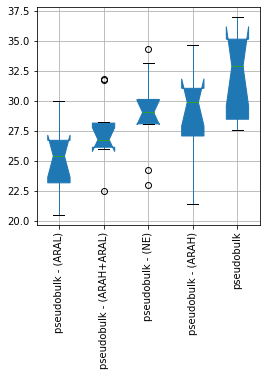

In [10]:
#visualisation
median_score.sort_values(ascending=True, inplace=True)
predicted_score = predicted_score[median_score.index]
plt.figure(figsize=(4,4))
predicted_score.boxplot(patch_artist=True, notch=True)
plt.xticks(rotation=90, size=10)
plt.show()